# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

# Reading the dataset

In [2]:
df = pd.read_csv('preprocessed.csv')

In [3]:
df.head()

,Unnamed: 0,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_lower_bound,age_upper_bound
0,0,708746,916,103916,30-34,M,15,7350.0,1.0,1.43,2,1.0,30,34
1,1,708749,916,103917,30-34,M,16,17861.0,2.0,1.82,2,0.0,30,34
2,2,708771,916,103920,30-34,M,20,693.0,0.0,0.00,1,0.0,30,34
3,3,708815,916,103928,30-34,M,28,4259.0,1.0,1.25,1,0.0,30,34
4,4,708818,916,103928,30-34,M,28,4133.0,1.0,1.29,1,1.0,30,34


# Data Exploration

In [4]:
# Getting basic information about the data
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1143 non-null   int64  
 1   ad_id                1143 non-null   int64  
 2   xyz_campaign_id      1143 non-null   int64  
 3   fb_campaign_id       1143 non-null   int64  
 4   age                  1143 non-null   object 
 5   gender               1143 non-null   object 
 6   interest             1143 non-null   int64  
 7   Impressions          1143 non-null   float64
 8   Clicks               1143 non-null   float64
 9   Spent                1143 non-null   float64
 10  Total_Conversion     1143 non-null   int64  
 11  Approved_Conversion  1143 non-null   float64
 12  age_lower_bound      1143 non-null   int64  
 13  age_upper_bound      1143 non-null   int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 125.1+ KB
None


,Unnamed: 0,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_lower_bound,age_upper_bound
count,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,571.000000,9.872611e+05,1067.382327,133783.989501,32.766404,144418.444226,24.663823,38.889503,2.130359,0.710849,36.321085,40.321085
std,330.099985,1.939928e+05,121.629393,20500.308622,26.952131,184174.591624,31.631072,50.502589,1.725866,0.817489,5.903868,5.903868
min,0.000000,7.087460e+05,916.000000,103916.000000,2.000000,87.000000,0.000000,0.000000,0.000000,0.000000,30.000000,34.000000
25%,285.500000,7.776325e+05,936.000000,115716.000000,16.000000,6503.500000,1.000000,1.480000,1.000000,0.000000,30.000000,34.000000
50%,571.000000,1.121185e+06,1178.000000,144549.000000,25.000000,51509.000000,8.000000,12.370000,1.000000,1.000000,35.000000,39.000000
75%,856.500000,1.121804e+06,1178.000000,144657.500000,31.000000,221769.000000,37.500000,60.025000,3.000000,1.000000,40.000000,44.000000
max,1142.000000,1.314415e+06,1178.000000,179982.000000,114.000000,544667.250000,92.250000,147.842500,6.000000,2.500000,45.000000,49.000000


In [5]:
df['ad_id'].nunique()

1143

In [6]:
df['xyz_campaign_id'].nunique()

3

In [7]:
df['fb_campaign_id'].nunique()

691

In [8]:
xyz_imp = df.groupby('xyz_campaign_id', as_index = False).agg({'Impressions': 'sum', 'Clicks': 'sum', 'Spent': 'sum'})
xyz_imp

,xyz_campaign_id,Impressions,Clicks,Spent
0,916,4.829250e+05,113.00,149.710001
1,936,8.128187e+06,1938.50,2832.455000
2,1178,1.564592e+08,26139.25,41468.537480


In [9]:
melt = pd.melt(xyz_imp, id_vars = ['xyz_campaign_id'], value_vars = ['Impressions', 'Clicks', 'Spent'], var_name = 'result', value_name = 'total')
melt

,xyz_campaign_id,result,total
0,916,Impressions,4.829250e+05
1,936,Impressions,8.128187e+06
2,1178,Impressions,1.564592e+08
3,916,Clicks,1.130000e+02
4,936,Clicks,1.938500e+03
5,1178,Clicks,2.613925e+04
6,916,Spent,1.497100e+02
7,936,Spent,2.832455e+03
8,1178,Spent,4.146854e+04


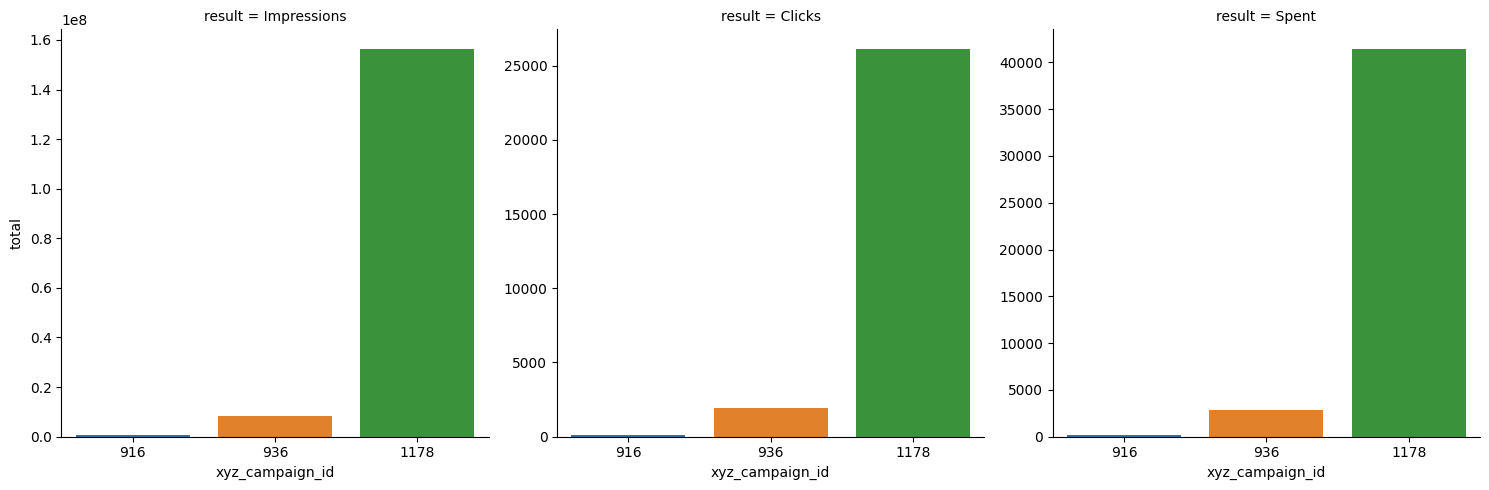

In [10]:
sns.catplot(x = 'xyz_campaign_id', y = 'total', col = 'result', data = melt, kind = 'bar', sharey = False)
plt.show()

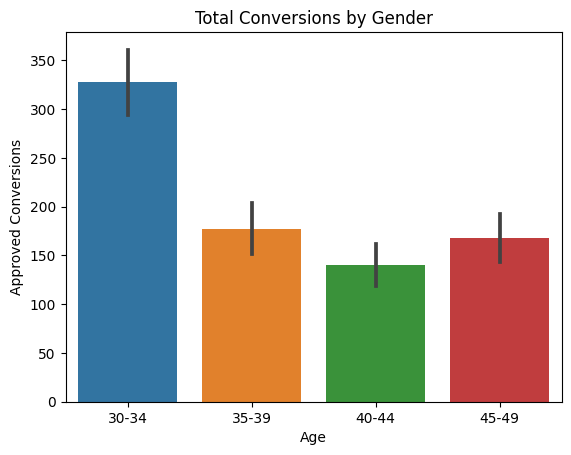

In [11]:
sns.barplot(x='age', y='Approved_Conversion', data=df, estimator=sum)
plt.title('Total Conversions by Gender')
plt.xlabel('Age')
plt.ylabel('Approved Conversions')
plt.show()

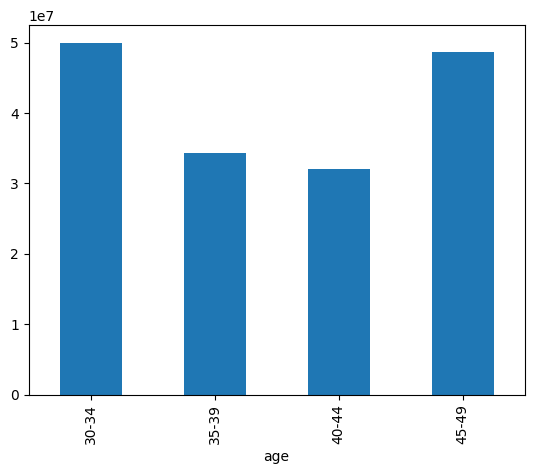

In [12]:
imp_by_age = df.groupby('age')['Impressions'].sum()
imp_by_age.plot(kind = 'bar')
plt.show()

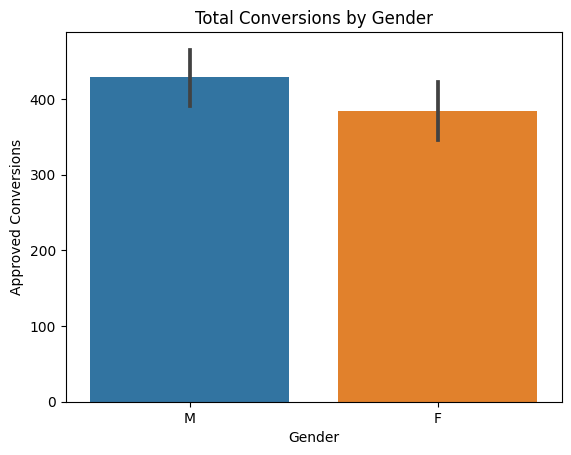

In [13]:
sns.barplot(x='gender', y='Approved_Conversion', data=df, estimator=sum)
plt.title('Total Conversions by Gender')
plt.xlabel('Gender')
plt.ylabel('Approved Conversions')
plt.show()

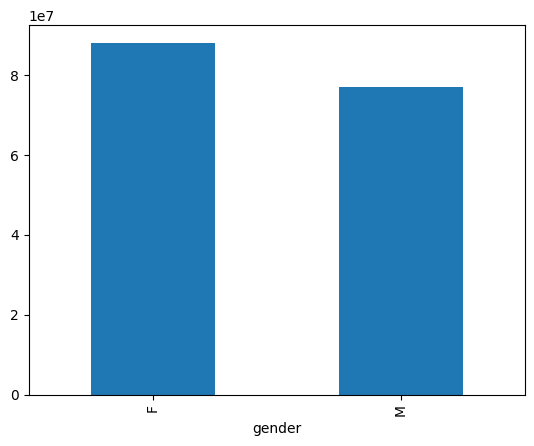

In [14]:
imp_by_gender = df.groupby('gender')['Impressions'].sum()
imp_by_gender.plot(kind = 'bar')
plt.show()

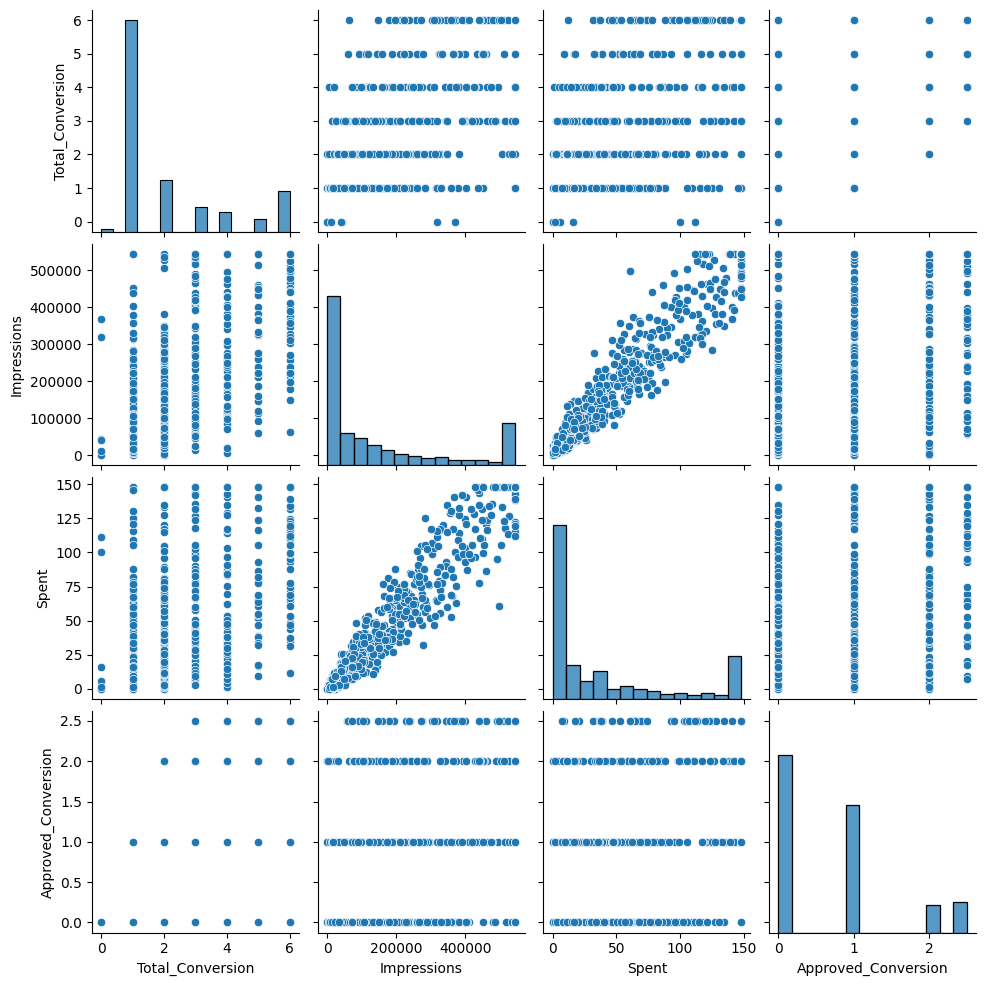

In [15]:
sns.pairplot(df[['Total_Conversion', 'Impressions', 'Spent', 'Approved_Conversion']])
plt.show()

In [16]:
 performance =df.groupby('xyz_campaign_id').agg({'Impressions': 'sum', 
                                                        'Clicks': 'sum', 
                                                        'Spent': 'sum', 
                                                        'Total_Conversion': 'sum', 
                                                        'Approved_Conversion': 'sum'})

In [17]:
 performance.reset_index(inplace = True)

In [18]:
 performance

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,916,4.829250e+05,113.00,149.710001,58,24.0
1,936,8.128187e+06,1938.50,2832.455000,537,182.5
2,1178,1.564592e+08,26139.25,41468.537480,1840,606.0


In [19]:
 # add columns of online ads metrics

# CTR (Click Through Rate)
performance['ctr'] = performance['Clicks'] / performance['Impressions'] *100

# RPM (Revenue Per Mille) 
# Mille here indicates 1,000 impressions
performance['rpm']= performance['Spent'] / performance['Impressions'] /1000

# RPC (Revenue Per Click)
performance['rpc']= performance['Spent'] / performance['Clicks']

In [20]:
performance

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,rpm,rpc
0,916,4.829250e+05,113.00,149.710001,58,24.0,0.023399,3.100067e-07,1.324867
1,936,8.128187e+06,1938.50,2832.455000,537,182.5,0.023849,3.484732e-07,1.461158
2,1178,1.564592e+08,26139.25,41468.537480,1840,606.0,0.016707,2.650438e-07,1.586447


# Feature Engineering

In [21]:
#GENDER Label Encoding

In [22]:
df = pd.get_dummies(df, columns=['gender'], prefix='gender', drop_first=True)  
df['gender_M'] = df['gender_M'].astype(int)
#1 if its Male & 0 if its Female

In [23]:
##AGE Label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['age_encoded'] = le.fit_transform(df['age'])
df.drop(columns='Unnamed: 0',inplace=True)
df
# 30-34 = 0
# 35-39 = 1
# 40-44 = 2
# 45-49 = 3

,ad_id,xyz_campaign_id,fb_campaign_id,age,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_lower_bound,age_upper_bound,gender_M,age_encoded
0,708746,916,103916,30-34,15,7350.00,1.00,1.430000,2,1.0,30,34,1,0
1,708749,916,103917,30-34,16,17861.00,2.00,1.820000,2,0.0,30,34,1,0
2,708771,916,103920,30-34,20,693.00,0.00,0.000000,1,0.0,30,34,1,0
3,708815,916,103928,30-34,28,4259.00,1.00,1.250000,1,0.0,30,34,1,0
4,708818,916,103928,30-34,28,4133.00,1.00,1.290000,1,1.0,30,34,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,109,544667.25,92.25,147.842500,6,2.0,45,49,0,3
1139,1314411,1178,179978,45-49,110,544667.25,92.25,147.842500,3,0.0,45,49,0,3
1140,1314412,1178,179979,45-49,111,151531.00,28.00,40.289999,2,0.0,45,49,0,3
1141,1314414,1178,179981,45-49,113,544667.25,92.25,147.842500,6,2.0,45,49,0,3


In [25]:
df['age_encoded'].unique()

array([0, 1, 2, 3])

In [26]:
df['gender_M'].unique()

array([1, 0])

In [27]:
df['spent_clicks_campaign_interaction'] = df['Spent'] * df['Clicks'] * df['xyz_campaign_id']

In [28]:
df['spent_clicks_age_interaction'] = df['Spent'] * df['Clicks'] * df['age_encoded']

In [29]:
df['spent_clicks_interest_interaction'] = df['Spent'] * df['Clicks'] * df['interest']

In [30]:
print(df[['spent_clicks_campaign_interaction', 'spent_clicks_age_interaction', 'spent_clicks_interest_interaction', 'Approved_Conversion']])

      spent_clicks_campaign_interaction  spent_clicks_age_interaction  \
0                          1.309880e+03                      0.000000   
1                          3.334240e+03                      0.000000   
2                          0.000000e+00                      0.000000   
3                          1.145000e+03                      0.000000   
4                          1.181640e+03                      0.000000   
...                                 ...                           ...   
1138                       1.606612e+07                  40915.411808   
1139                       1.606612e+07                  40915.411808   
1140                       1.328925e+06                   3384.359957   
1141                       1.606612e+07                  40915.411808   
1142                       1.606612e+07                  40915.411808   

      spent_clicks_interest_interaction  Approved_Conversion  
0                          2.145000e+01                  1.0

In [31]:
df['spent_per_click'] = df['Spent'] / (df['Clicks'] + 1)  # Adding 1 to avoid division by zero

In [32]:
columns_to_drop = ['age','age_lower_bound','age_upper_bound','xyz_campaign_id','ad_id','fb_campaign_id']
df = df.drop(columns=columns_to_drop)

In [33]:
df['Approved_Conversion'] = df['Approved_Conversion'].apply(lambda x: 1 if x > 0 else 0)

In [34]:
df

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_M,age_encoded,spent_clicks_campaign_interaction,spent_clicks_age_interaction,spent_clicks_interest_interaction,spent_per_click
0,15,7350.00,1.00,1.430000,2,1,1,0,1.309880e+03,0.000000,2.145000e+01,0.715000
1,16,17861.00,2.00,1.820000,2,0,1,0,3.334240e+03,0.000000,5.824000e+01,0.606667
2,20,693.00,0.00,0.000000,1,0,1,0,0.000000e+00,0.000000,0.000000e+00,0.000000
3,28,4259.00,1.00,1.250000,1,0,1,0,1.145000e+03,0.000000,3.500000e+01,0.625000
4,28,4133.00,1.00,1.290000,1,1,1,0,1.181640e+03,0.000000,3.612000e+01,0.645000
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,109,544667.25,92.25,147.842500,6,1,0,3,1.606612e+07,40915.411808,1.486593e+06,1.585442
1139,110,544667.25,92.25,147.842500,3,0,0,3,1.606612e+07,40915.411808,1.500232e+06,1.585442
1140,111,151531.00,28.00,40.289999,2,0,0,3,1.328925e+06,3384.359957,1.252213e+05,1.389310
1141,113,544667.25,92.25,147.842500,6,1,0,3,1.606612e+07,40915.411808,1.541147e+06,1.585442


# Correlation Checking

In [35]:
corr_matrix = df.corr()
corr_matrix['Approved_Conversion'].sort_values(ascending=False)

Approved_Conversion                  1.000000
Total_Conversion                     0.442210
Impressions                          0.337273
Spent                                0.310743
Clicks                               0.306012
spent_clicks_campaign_interaction    0.293684
spent_per_click                      0.238556
spent_clicks_interest_interaction    0.208365
spent_clicks_age_interaction         0.170931
interest                             0.073569
gender_M                             0.040371
age_encoded                         -0.043453
Name: Approved_Conversion, dtype: float64

In [36]:
columns_to_drop = ['Approved_Conversion','Impressions', 'Spent', 'Clicks',]
X = df.drop(columns= columns_to_drop )
y = df['Approved_Conversion']

# Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Apply undersampling
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None,10, 20, 30],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4,8]
    # Add other hyperparameters as needed
}

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to create the final model
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Train the model on the entire training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
print("ROC-AUC Score:", roc_auc)


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.71
Confusion Matrix:
[[97 15]
 [50 62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       112
           1       0.81      0.55      0.66       112

    accuracy                           0.71       224
   macro avg       0.73      0.71      0.70       224
weighted avg       0.73      0.71      0.70       224

ROC-AUC Score: 0.7098214285714286
